# Data processing for bump hunt

Main differences for bump hunt:
- No fully supervised set
- test set covers the whole SR / SB range



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from helpers.plotting import *
plt.style.use("../science.mplstyle")



In [2]:
project_id = "lowmass"
path_to_compiled_data = f"/pscratch/sd/r/rmastand/dimuonAD/compiled_data/{project_id}"

    
if project_id == "SUSY":
    codes_list = ["BSM_HAA", "SM_SIM"]
    sim_id = "SM_SIM"
    signal_id = "BSM_HAA"
    
elif project_id == "etaj":
    codes_list = ["DATA_jet"]
    sim_id = "DATA_jet"
    signal_id = "DATA_jet"
    
    
elif project_id == "lowmass":
    codes_list = ["DATA_nojet"]
    sim_id = "DATA_nojet"
    signal_id = "DATA_nojet"

    
uncut_data = {}
for code in codes_list:
    with open(f"{path_to_compiled_data}/{code}", "rb") as ifile:
        uncut_data[code] = pickle.load(ifile)
    
    print(code, uncut_data[code][list(uncut_data[code].keys())[0]].shape)

DATA_nojet (21803678,)


## Visualize the data

['muon_iso03', 'mu0_eta', 'mu1_eta', 'mu0_pt', 'mu1_pt', 'mu0_phi', 'mu1_phi', 'muon_iso04', 'dimu_pt', 'dimu_eta', 'dimu_phi', 'n_muons', 'n_jets', 'dimu_mass', 'mumu_deltaR', 'mumu_deltapT']


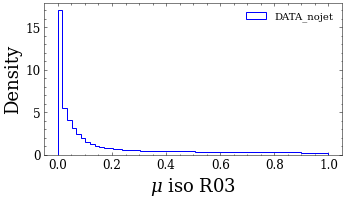

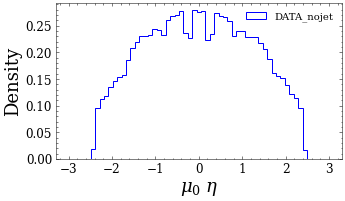

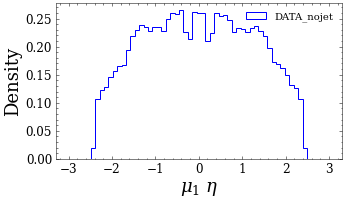

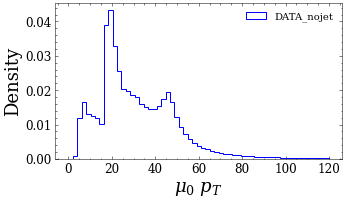

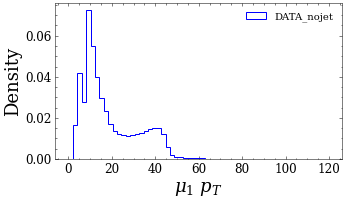

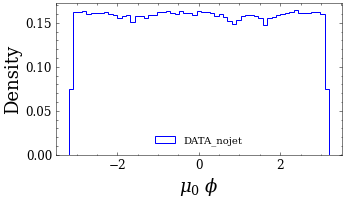

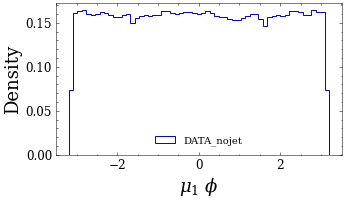

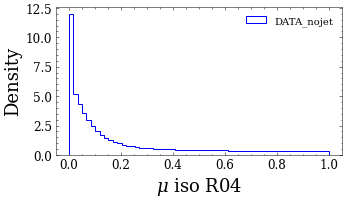

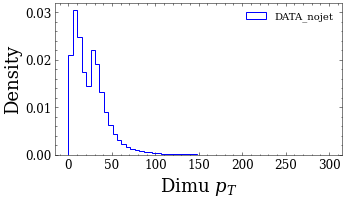

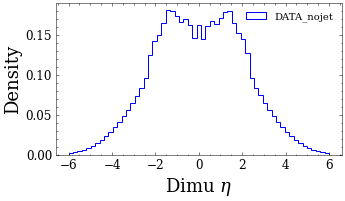

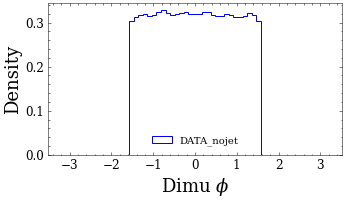

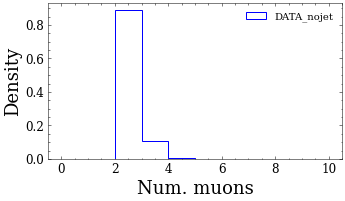

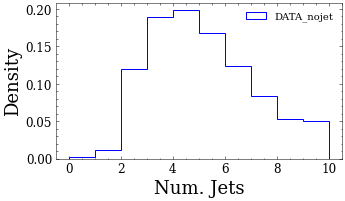

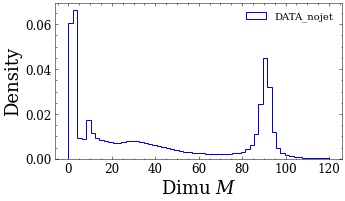

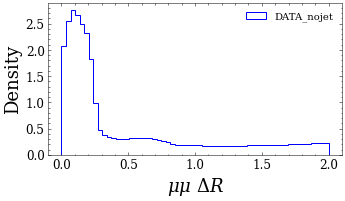

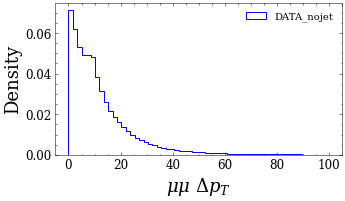

In [3]:
feature_set = list(uncut_data[codes_list[0]].keys())
print(feature_set)

hist_all_features(codes_list, uncut_data, feature_set, kwargs_dict_dtype, nice_labels=True)
    


## Make cuts

Now let's define cuts on the data. 

Muon cuts were made previously (and we don't want to make cuts on the dimuon system, either)

In [4]:
# jet_cuts

#jet_pt_cut = 0 
#jet_eta_cut = 10000


#btag_cut = 0.0


cut_data = {}
for code in codes_list:
    
    # pt_cut, eta cut on the jets
    #pass_indices = (uncut_data[code]["dijet_pt"] > jet_pt_cut) & (np.abs(uncut_data[code]["dijet_eta"]) < jet_eta_cut) & (uncut_data[code]["jet0_btag"] >= btag_cut) & (uncut_data[code]["jet1_btag"] >= btag_cut)
    #pass_indices = (uncut_data[code]["dimu_pt"] > 45)
    pass_indices = (uncut_data[code]["muon_iso04"] > -1)
    cut_data[code] = {}
    
    
    for feat in feature_set:
        cut_data[code][feat] = uncut_data[code][feat][pass_indices]
    
    print(f"{code} has shape {cut_data[code][feat].shape} after cuts")
    

DATA_nojet has shape (21803678,) after cuts


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


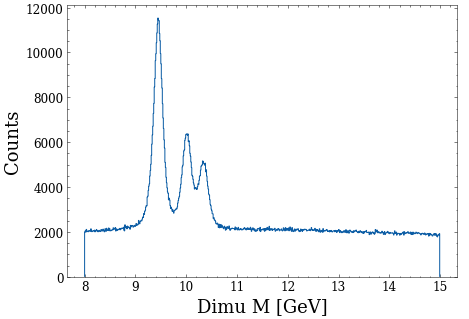

In [5]:



plt.figure(figsize = (7,5))
    

loc_filter = cut_data[code]["dimu_pt"]>=0
plt.hist(cut_data[code]["dimu_mass"][loc_filter], bins = np.arange(8,15, 0.01), 
        histtype = "step", 
    
        )


plt.xlabel("Dimu M [GeV]")
plt.ylabel("Counts")
plt.legend(loc = (1, 0))
plt.show()
 
    
#hist_all_features(codes_list, cut_data, feature_set, kwargs_dict_dtype)
    

## Define SR / SB

Signal region can be anywhere from 10 - 90 geV

In [8]:
particle_type = "none"

if particle_type == "eta":
    band_bounds = {"SBL": [0.3, 0.527],
                   "IBL": [0.3, 0.527],
                   "SR": [0.527, 0.567],
                   "IBH": [0.567, 0.72],
                   "SBH": [0.567, 0.72], 
                           }


elif particle_type == "upsilon":
    band_bounds = {"SBL": [8, 9],
                   "IBL": [8, 9],
                   "SR": [9, 10.8],
                   "IBH": [10.8, 15],
                   "SBH": [10.8, 15], 
                           }
    
    
elif particle_type == "none":
    band_bounds = {"SBL": [14, 17.5],
                   "IBL": [14, 17.5],
                   "SR": [17.5, 19.5],
                   "IBH": [19.5, 23],
                   "SBH": [19.5, 23], 
                           }



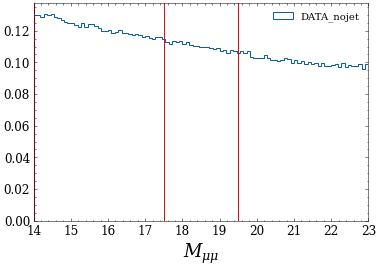

In [9]:
plt.figure()

for code in codes_list:
    plt.hist(cut_data[code]["dimu_mass"], bins = np.linspace(band_bounds["SBL"][0], band_bounds["SBH"][1], 100), histtype = "step", density = "True", label = code)

plt.legend()
plt.axvline(band_bounds["SBL"][0], color= "red")
plt.axvline(band_bounds["IBL"][0], color= "red")
plt.axvline(band_bounds["SR"][0], color= "red")
plt.axvline(band_bounds["IBH"][0], color= "red")
plt.axvline(band_bounds["SBH"][0], color= "red")
plt.axvline(band_bounds["SBH"][1], color= "red")

plt.xlabel("$M_{\mu\mu}$")

plt.xlim(band_bounds["SBL"][0], band_bounds["SBH"][1])
#plt.yscale("log")
plt.show()

In [10]:
SR_data_preprocc = {}
SBL_data_preprocc = {} # sideband low
SBH_data_preprocc = {} # sideband high
IBL_data_preprocc = {} # innerband low
IBH_data_preprocc = {} # innerband high

bands = ["SBL", "IBL", "SR", "IBH", "SBH"]

preproc_dicts = {b:{} for b in bands}


for code in codes_list:
    for b in bands:

        loc_pass_indices = (cut_data[code]["dimu_mass"] >= band_bounds[b][0]) & (cut_data[code]["dimu_mass"] < band_bounds[b][1])
        
        preproc_dicts[b][code] = {}

        for feat in feature_set:
            preproc_dicts[b][code][feat] = cut_data[code][feat][loc_pass_indices]

        print(f"{code} {b} has shape {preproc_dicts[b][code][feat].shape}")
        
    print()
   
    
    

DATA_nojet SBL has shape (640481,)
DATA_nojet IBL has shape (640481,)
DATA_nojet SR has shape (329927,)
DATA_nojet IBH has shape (527775,)
DATA_nojet SBH has shape (527775,)



In [ ]:
#hist_all_features(codes_list, SR_data_preprocc, kwargs_dict, feature_bins)
#hist_all_features(codes_list, SB1_data_preprocc, kwargs_dict, feature_bins)
#hist_all_features(codes_list, SB2_data_preprocc, kwargs_dict, feature_bins)

## Preprocessing

Standard scaling is fine

In [11]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

proccessed_data_dict = {b:{"s_inj_data":{}} for b in bands}


    

for feat in feature_set: # also could scale everythign together - same results, but maybe more efficient
    
    SB_all = np.hstack((preproc_dicts["SBL"][sim_id][feat], preproc_dicts["SBH"][sim_id][feat])).reshape(-1, 1)
    loc_feat_scaler = StandardScaler()
    loc_feat_scaler = loc_feat_scaler.fit(SB_all)
    
    if feat == "dimu_mass":
    
        with open(f"processed_data/mass_scaler_{particle_type}", "wb") as ofile:
            pickle.dump(loc_feat_scaler, ofile)

    
    for b in bands:
        proccessed_data_dict[b]["s_inj_data"][feat] = loc_feat_scaler.transform(preproc_dicts[b][sim_id][feat].reshape(-1, 1))
        if ("pt" in feat) or ("iso" in feat) or ("jet_mass" in feat) or ("deltapT" in feat):
            proccessed_data_dict[b]["s_inj_data"][feat] = (proccessed_data_dict[b]["s_inj_data"][feat]-10)/4
        if particle_type == "eta":
            if ("mumu_deltaR" in feat):
                proccessed_data_dict[b]["s_inj_data"][feat] = (proccessed_data_dict[b]["s_inj_data"][feat]-2)/2

            



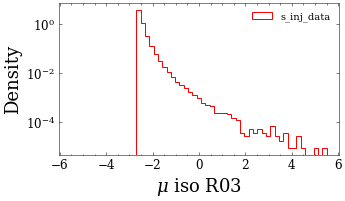

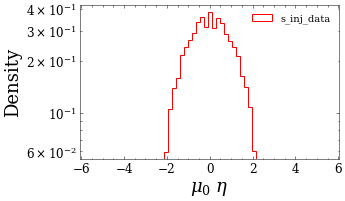

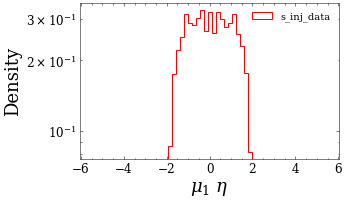

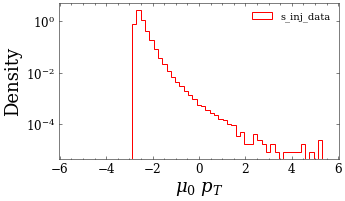

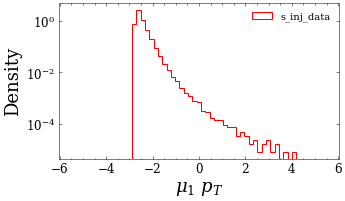

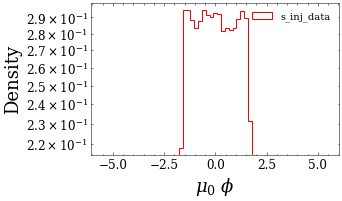

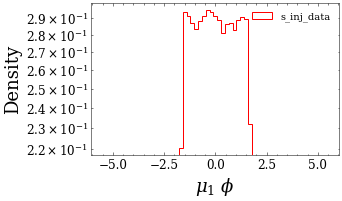

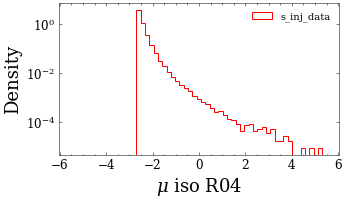

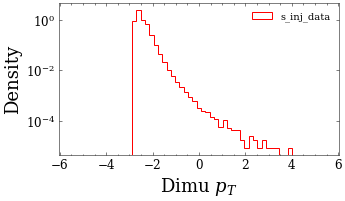

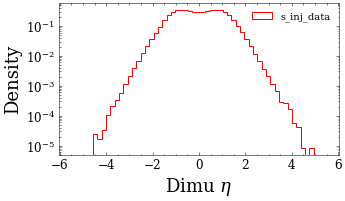

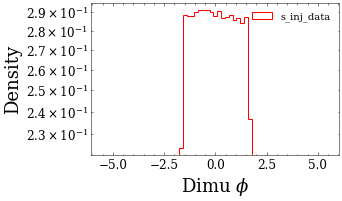

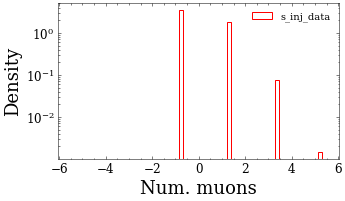

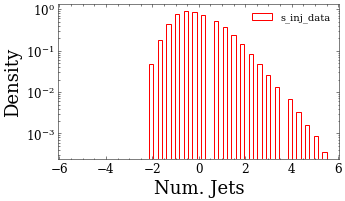

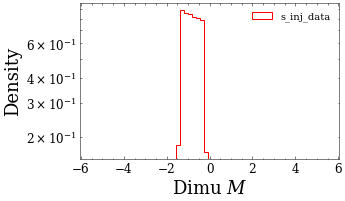

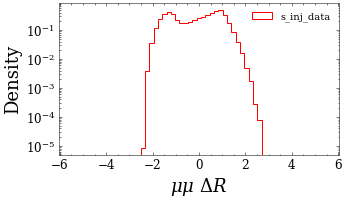

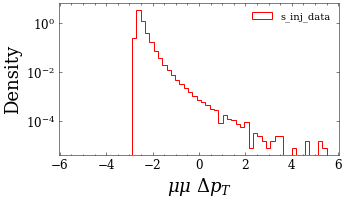

In [12]:
hist_all_features(["s_inj_data"], proccessed_data_dict["SBL"], feature_set, kwargs_dict_dtype, 
                  scaled_features = True, plot_bound = 5.5, yscale_log = True, nice_labels = True)


In [13]:


# specify a percentage of events to set aside for the test set
frac_test_set = 0.2

train_data_dict = {b:{"s_inj_data":{}} for b in bands}
test_data_dict = {b:{"s_inj_data":{}} for b in bands}

for feat in feature_set:
    for b in bands:
        
        num_test_events = int((1.0 - frac_test_set)*proccessed_data_dict[b]["s_inj_data"][feat].shape[0])
        train_data_dict[b]["s_inj_data"][feat] = proccessed_data_dict[b]["s_inj_data"][feat][:num_test_events]
        test_data_dict[b]["s_inj_data"][feat] = proccessed_data_dict[b]["s_inj_data"][feat][num_test_events:]
        
        
        

with open(f"processed_data/{project_id}_{particle_type}_nojet_train_band_data", "wb") as ofile:
    pickle.dump(train_data_dict, ofile)
        
        
with open(f"processed_data/{project_id}_{particle_type}_nojet_test_band_data", "wb") as ofile:
    pickle.dump(test_data_dict, ofile)
    
